<a href="https://colab.research.google.com/github/deepsignal/mapping_algos/blob/main/Feb23_maps_z1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Maps code, using the new compression engine file. 

In [5]:
from google.colab import drive  
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
# experiments towards the tail end of dec 2022
# adding roatation code, to manipulate points. 
import json

In [7]:
#copied_path = '/content/gdrive/MyDrive/combo_files/nlp_format_adriandevice.json'
copied_path = '/content/gdrive/MyDrive/5db8f4ebbca6fe4cba7f6543_20221112_163300_20221112_164300_reassign.json' # taj single walkthru 5 min
#copied_path = '/content/gdrive/MyDrive/dt_demoday_live_data_reassign.json' # DT_demo Steven Uhoto
#copied_path = '/content/gdrive/MyDrive/taj_fullday_5db8f4ebbca6fe4cba7f6543_20221106_000000_20221106_230000_reassign.json'    # taj full dat

with open(copied_path) as f:
  compress_data = json.load(f)

#print(len(compress_data["max_topology"]))
# 21

with open(copied_path) as f:
  compress_data = json.load(f)

#print(len(compress_data["max_topology"]))
# 21

In [83]:
compress_data.keys()

dict_keys(['all_location', 'topo1', 'topo2'])

In [84]:
compress_data['topo1'].keys()

dict_keys(['topology', 'combo_occurrence', 'transition_info', 'combo_sequence', 'time_sequence'])

In [85]:
compress_data['topo1']['combo_sequence'][1:5]

[3, 15, 15, 21]

In [86]:
len(compress_data['topo1']['combo_sequence'])

961

In [87]:
# How many total combos are there in the time series
len(set(compress_data['topo1']['combo_sequence']))

56

In [88]:
import numpy as np
np.set_printoptions(suppress=True)
np.set_printoptions(linewidth=np.inf)
np.set_printoptions(precision=2)

In [137]:
data1 = compress_data['topo1']['combo_sequence']

# filter the time series using only selected combos
data2 = []
top_combos = 11 #12  # replace with a list of selections
selected_combos = [i+1 for i in range(top_combos)]
for i in data1:
  if i in selected_combos:
    data2.append(i)

print(data2)


[3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 10, 6, 6, 6, 6, 6, 6, 1, 1, 1, 1, 1, 1, 6, 6, 6, 6, 6, 6, 10, 10, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 3, 3, 3, 3, 9, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 9, 9, 9, 2, 9, 2, 2, 2, 9, 9, 9, 2, 9, 2, 2, 2, 2, 9, 2, 8, 3, 3, 3, 6, 6, 3, 3, 3, 3, 11, 11, 11, 11, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 10, 10, 6, 6, 6, 6, 10, 1, 1, 1, 1, 1, 1, 6, 6, 6, 6, 10, 10, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 8, 8, 8, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 9, 2, 2, 2, 2, 9, 2, 2, 2, 2, 2, 2, 9, 9, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 1, 11, 3, 3, 3, 3, 3, 3, 6, 3, 3, 3, 11, 11, 11, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 7, 7, 7, 7, 7, 7, 5, 5, 5, 5, 5, 3, 3, 3, 6, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 11, 11, 11, 11, 8, 8, 8, 1, 1, 1, 1, 1, 1

In [138]:
print(selected_combos)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [139]:
for i in range(20):
  k = compress_data['topo1']['transition_info']['Combo'+str(i+1)] #['links']
  #print('Combo'+str(i+1)+'::',k['links'], '<<<>>>', k['location'])
  print('Combo'+str(i+1)+'::',k['links'])

Combo1:: ['4C72700E0D.4C72700E1C', '4C72700E1C.4C72700E0D', '4C72700E1C.4C72700E2C', '4C72700E1C.f081731d0c40', '4C72700E2C.4C72700E1C']
Combo2:: ['4C72700E2C.4C72700E2E', '4C72700E2E.4C72700E2C']
Combo3:: ['4C72700E0D.4C72700E1C', '4C72700E1C.4C72700E0D']
Combo4:: ['4C72700E1C.4C72700E2C', '4C72700E2C.4C72700E1C', '4C72700E2C.4C72700E2E', '4C72700E2C.58d34926c760', '4C72700E2E.4C72700E2C']
Combo5:: ['4C72700E2C.4C72700E2E', '4C72700E2C.58d34926c760', '4C72700E2E.4C72700E2C']
Combo6:: ['4C72700E0D.4C72700E1C', '4C72700E1C.4C72700E0D', '4C72700E1C.f081731d0c40']
Combo7:: ['4C72700E2C.58d34926c760']
Combo8:: ['4C72700E0D.4C72700E1C', '4C72700E1C.4C72700E0D', '4C72700E1C.4C72700E2C', '4C72700E2C.4C72700E1C']
Combo9:: ['4C72700E1C.f081731d0c40', '4C72700E2C.4C72700E2E', '4C72700E2E.4C72700E2C']
Combo10:: ['4C72700E0D.4C72700E1C', '4C72700E1C.4C72700E0D', '4C72700E1C.4C72700E2C', '4C72700E1C.f081731d0c40']
Combo11:: ['4C72700E0D.4C72700E1C', '4C72700E1C.4C72700E0D', '4C72700E1C.4C72700E2C',

In [140]:
for i in range(top_combos):
  k = compress_data['topo1']['transition_info']['Combo'+str(i+1)] #['links']
  #print('Combo'+str(i+1)+'::',k['links'], '<<<>>>', k['location'])
  print('Combo'+str(i+1)+'::',k['links'])

Combo1:: ['4C72700E0D.4C72700E1C', '4C72700E1C.4C72700E0D', '4C72700E1C.4C72700E2C', '4C72700E1C.f081731d0c40', '4C72700E2C.4C72700E1C']
Combo2:: ['4C72700E2C.4C72700E2E', '4C72700E2E.4C72700E2C']
Combo3:: ['4C72700E0D.4C72700E1C', '4C72700E1C.4C72700E0D']
Combo4:: ['4C72700E1C.4C72700E2C', '4C72700E2C.4C72700E1C', '4C72700E2C.4C72700E2E', '4C72700E2C.58d34926c760', '4C72700E2E.4C72700E2C']
Combo5:: ['4C72700E2C.4C72700E2E', '4C72700E2C.58d34926c760', '4C72700E2E.4C72700E2C']
Combo6:: ['4C72700E0D.4C72700E1C', '4C72700E1C.4C72700E0D', '4C72700E1C.f081731d0c40']
Combo7:: ['4C72700E2C.58d34926c760']
Combo8:: ['4C72700E0D.4C72700E1C', '4C72700E1C.4C72700E0D', '4C72700E1C.4C72700E2C', '4C72700E2C.4C72700E1C']
Combo9:: ['4C72700E1C.f081731d0c40', '4C72700E2C.4C72700E2E', '4C72700E2E.4C72700E2C']
Combo10:: ['4C72700E0D.4C72700E1C', '4C72700E1C.4C72700E0D', '4C72700E1C.4C72700E2C', '4C72700E1C.f081731d0c40']
Combo11:: ['4C72700E0D.4C72700E1C', '4C72700E1C.4C72700E0D', '4C72700E1C.4C72700E2C',

In [141]:
#compress_data['topo1']['transition_info']['Combo1']['location'].split(':')[0]
compress_data['topo1']['topology']


['4C72700E0D.4C72700E1C',
 '4C72700E1C.4C72700E0D',
 '4C72700E1C.4C72700E2C',
 '4C72700E1C.f081731d0c40',
 '4C72700E2C.4C72700E1C',
 '4C72700E2C.4C72700E2E',
 '4C72700E2C.58d34926c760',
 '4C72700E2E.4C72700E2C']

In [142]:
# Converting each combo to a 'list of links' for similarity calculation
lstoflinks = compress_data['topo1']['topology']
linkset = compress_data['topo1']['transition_info']['Combo'+str(1)]['links']
tok_out = [1 if i in lstoflinks else 0  for i in lstoflinks]

print(tok_out)
#print(linkset)

token_sz = len(lstoflinks)
all_tokens = np.zeros((top_combos,token_sz))
for i in range(1,top_combos): # replace top_combos from a number to a list
  linkset = compress_data['topo1']['transition_info']['Combo'+str(i)]['links']
  all_tokens[i][:] = np.array([1 if i in linkset else 0  for i in lstoflinks])


print(all_tokens)



[1, 1, 1, 1, 1, 1, 1, 1]
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 1.]
 [1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 1. 1. 1.]
 [1. 1. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 1. 1. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 1. 0. 1.]
 [1. 1. 1. 1. 0. 0. 0. 0.]]


In [143]:
# Rotating points across a given point

def rotate(p, origin=(0, 0), degrees=0):
    angle = np.deg2rad(degrees)
    R = np.array([[np.cos(angle), -np.sin(angle)],
                  [np.sin(angle),  np.cos(angle)]])
    o = np.atleast_2d(origin)
    p = np.atleast_2d(p)
    return np.squeeze((R @ (p.T-o.T) + o.T).T)


points=[(200, 300), (100, 300)]
origin=(100,100)

new_points = rotate(points, origin=origin, degrees=10)
print(new_points)

[[163.75 314.33]
 [ 65.27 296.96]]


{'Combo1': Text(-2.689025545318492, 0.26017722294591766, '\n\n4C72700E1C '),
 'Combo2': Text(1.7738596048864532, -0.4363859237113631, '\n\n4C72700E2E '),
 'Combo3': Text(-0.9491183546295193, 0.22719492589034343, '\n\n4C72700E0D '),
 'Combo4': Text(2.7703166187412935, 1.0629175711182615, '\n\n4C72700E2C '),
 'Combo5': Text(2.1077223699171728, -0.06504930186964425, '\n\n4C72700E2E '),
 'Combo6': Text(-1.4678083509610715, -0.9251327344160252, '\n\n4C72700E0D '),
 'Combo7': Text(0.6906475620199175, 1.0171818889837143, '\n\n58d34926c760 '),
 'Combo8': Text(-2.295696642799838, 0.42035935318680834, '\n\n4C72700E1C '),
 'Combo9': Text(1.9898501359143337, -1.0597998281316325, '\n\n4C72700E2E '),
 'Combo10': Text(-2.267314536721296, -0.024593191599910764, '\n\n4C72700E1C ')}

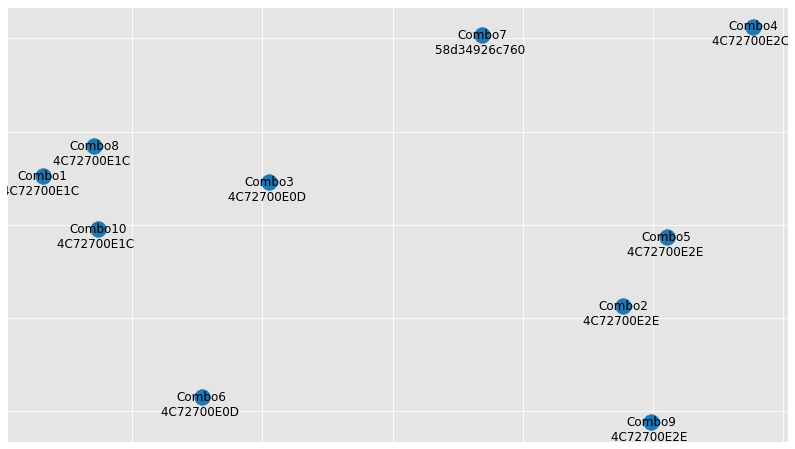

In [144]:
# Give tokens as input to the dimensionality reduction

from sklearn.manifold import MDS
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import Isomap
from sklearn.manifold import SpectralEmbedding

import warnings
warnings.filterwarnings('ignore')


#mds = MDS(2,metric=True, random_state=0,dissimilarity='precomputed')
#X_2d = mds.fit_transform((markov_mat_inv_sym))
#X_2d = mds.fit_transform((tr_mat))  # trying anothor distance type

#embedding = LocallyLinearEmbedding(n_components=2, n_neighbors=4)
#embedding = SpectralEmbedding(n_components=2,n_neighbors=3)
embedding1 = Isomap(n_components=2, n_neighbors=4)
TokenX_2d = embedding1.fit_transform(all_tokens)


# preparing a dictionary of nodes
from collections import OrderedDict
node_dict=OrderedDict()
node_labels = OrderedDict()

# 
len_data = TokenX_2d.shape[0] #len(data_transition.keys())
for i in range(1,len_data):
    #print(i)
    comboname='Combo'+str(i)   # 
    combo_loc = compress_data['topo1']['transition_info']['Combo'+str(i)]['location']
    #print(combo_loc)
    node_dict['Combo'+str(i)]=TokenX_2d[i] 
    node_labels['Combo'+str(i)]= '\n\n'+combo_loc.split(':')[0]

import networkx as nx

import matplotlib.pyplot as plt

'''
['fivethirtyeight',
 'seaborn-pastel',
 'seaborn-whitegrid',
 'ggplot',
 'grayscale']
 https://jakevdp.github.io/PythonDataScienceHandbook/04.11-settings-and-stylesheets.html
'''
plt.style.use('ggplot')
plt.figure(figsize=(14,8))

X = nx.Graph()
X.add_nodes_from(node_dict.keys())
#nx.draw_networkx_nodes(X,node_dict,node_labels)

nx.draw_networkx(X, node_dict, node_labels, node_size = 250, width=3, edge_color = 'grey')
nx.draw_networkx_labels(X, node_dict,node_labels)





In [145]:
#points=[(200, 300), (100, 300)]
origin=(0,0)
new_points = rotate(TokenX_2d, origin=origin, degrees=10)
print(new_points)

[[ 0.41 -0.41]
 [-2.69 -0.21]
 [ 1.82 -0.12]
 [-0.97  0.06]
 [ 2.54  1.53]
 [ 2.09  0.3 ]
 [-1.28 -1.17]
 [ 0.5   1.12]
 [-2.33  0.02]
 [ 2.14 -0.7 ]
 [-2.23 -0.42]]


In [146]:
# Example transition matrix creation

data = [3, 0, 1, 3, 2, 6, 5, 4, 7, 5, 4]
n = 11  # (this means there are 8 states in Markov chain from 0 - 7, both inclusive)
step = 1

def compute_transition_matrix(data, n, step = 1):
    P = np.zeros((n, n))
    T = np.zeros((n,n))
    m = len(data)
    for i in range(1,m):
        initial, final = i, i+ step
        if final < m:
            P[data[initial]-1][data[final]-1] += 1 # adjust for Combo1 naming
            T[data[initial]-1][data[final]-1] += 1

    np.fill_diagonal(P, 2) # to reduce frequency effect
    #np.fill_diagonal(P, np.sum(P, axis=1)) # 
    sums = np.sum(P, axis = 1)
    for i in range(n):
        for j in range(n):
            P[i][j] = P[i][j] / sums[i]
            #P[i][j] = P[i][j] 
    return P,T

#print(compute_transition_matrix([3, 0, 1, 3, 2, 6, 5, 4, 7, 5, 4], 8, 1))

In [147]:
tr_mat,count_mat = compute_transition_matrix(data2, top_combos, step = 1)
print(count_mat)
print(tr_mat)

[[153.   0.   0.   0.   0.   4.   0.   7.   0.   8.   1.]
 [  0. 119.   2.   0.   4.   0.   0.   2.  18.   0.   0.]
 [  2.   4.  94.   1.   0.   9.   0.   1.   1.   1.   5.]
 [  0.   0.   1.  57.   4.   0.   1.   0.   0.   0.   0.]
 [  1.   3.   2.   2.  47.   0.   3.   1.   2.   0.   1.]
 [  3.   1.   8.   0.   0.  38.   0.   1.   0.   8.   0.]
 [  0.   0.   0.   0.   4.   0.  34.   1.   0.   0.   0.]
 [  5.   0.   9.   0.   0.   0.   0.  20.   0.   0.   1.]
 [  0.  19.   0.   0.   2.   0.   0.   0.  13.   0.   0.]
 [  9.   0.   0.   0.   0.   7.   0.   1.   0.  16.   0.]
 [  0.   0.   1.   3.   1.   1.   1.   1.   0.   0.  20.]]
[[0.09 0.   0.   0.   0.   0.18 0.   0.32 0.   0.36 0.05]
 [0.   0.07 0.07 0.   0.14 0.   0.   0.07 0.64 0.   0.  ]
 [0.08 0.15 0.08 0.04 0.   0.35 0.   0.04 0.04 0.04 0.19]
 [0.   0.   0.12 0.25 0.5  0.   0.12 0.   0.   0.   0.  ]
 [0.06 0.18 0.12 0.12 0.12 0.   0.18 0.06 0.12 0.   0.06]
 [0.13 0.04 0.35 0.   0.   0.09 0.   0.04 0.   0.35 0.  ]
 [0.   0.   0

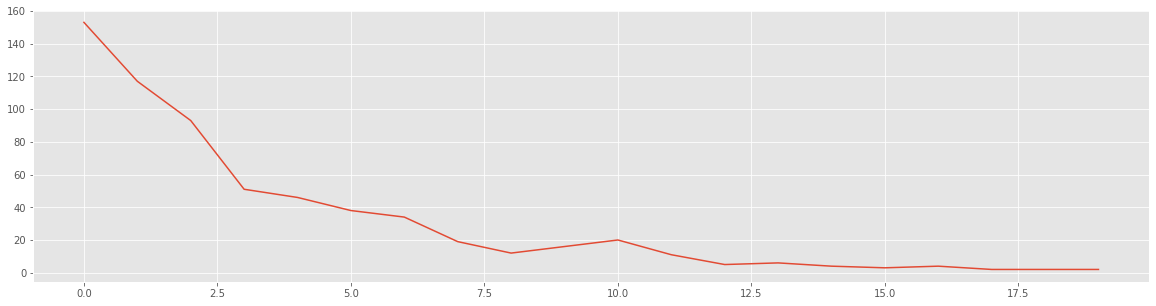

In [148]:
# plotting the sheer instance of combos switching to themselves

# filter the time series using only selected combos
data2_2 = []
top_combos_2 = 20 #12  # replace with a list of selections
selected_combos = [i+1 for i in range(top_combos_2)]
for i in data1:
  if i in selected_combos:
    data2_2.append(i)

#print(data2)
tr_mat1,count_mat1 = compute_transition_matrix(data2_2, top_combos_2, step = 1)
diag_tr = np.diag(count_mat1)
plt.figure(figsize=(20,5))
plt.plot(diag_tr)

In [149]:
#data2[1:30]
# Play around with the transition matrix
# Do some mods to the tr_mat, to try variations
# variation1 , Mix this matrix with similarity measure based on link disturbances 0.75*main_tr + 0.25*




In [150]:
from sklearn.manifold import MDS
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import Isomap
from sklearn.manifold import SpectralEmbedding

import warnings
warnings.filterwarnings('ignore')


#methods['LLE'] = LLE(method='standard')
#methods['LTSA'] = LLE(method='ltsa')
#methods['Hessian LLE'] = LLE(method='hessian')
##methods['Modified LLE'] = LLE(method='modified')
#methods['Isomap'] = manifold.Isomap(n_neighbors, n_components)
#methods['MDS'] = manifold.MDS(n_components, max_iter=100, n_init=1)
#methods['SE'] = manifold.SpectralEmbedding(n_components=n_components,
#                                           n_neighbors=n_neighbors)
#methods['t-SNE'] = manifold.TSNE(n_components=n_components, init='pca',
#                                 random_state=0)


#mds = MDS(2,metric=True, random_state=0,dissimilarity='precomputed')
#X_2d = mds.fit_transform((markov_mat_inv_sym))
#X_2d = mds.fit_transform((tr_mat))  # trying anothor distance type

embedding = LocallyLinearEmbedding(n_components=2, n_neighbors=4)
#embedding = SpectralEmbedding(n_components=2,n_neighbors=3)
embedding = Isomap(n_components=2, n_neighbors=4)
X_2d = embedding.fit_transform(tr_mat)

In [151]:
X_2d

array([[-0.52,  0.17],
       [ 0.55, -0.2 ],
       [-0.1 , -0.24],
       [ 0.35,  0.44],
       [ 0.17, -0.04],
       [-0.48, -0.12],
       [ 0.19,  0.66],
       [-0.3 , -0.06],
       [ 0.54, -0.54],
       [-0.51, -0.22],
       [ 0.12,  0.15]])

In [152]:
origin=(0,0)
X_2d = rotate(X_2d, origin=origin, degrees=90)
print(X_2d)

[[-0.17 -0.52]
 [ 0.2   0.55]
 [ 0.24 -0.1 ]
 [-0.44  0.35]
 [ 0.04  0.17]
 [ 0.12 -0.48]
 [-0.66  0.19]
 [ 0.06 -0.3 ]
 [ 0.54  0.54]
 [ 0.22 -0.51]
 [-0.15  0.12]]


In [153]:
# preparing a dictionary of nodes
from collections import OrderedDict
node_dict=OrderedDict()
node_labels = OrderedDict()

# 
len_data = X_2d.shape[0] #len(data_transition.keys())
for i in range(len_data):
    #print(i)
    comboname='Combo'+str(i)   # 
    combo_loc = compress_data['topo1']['transition_info']['Combo'+str(i+1)]['location']
    #print(combo_loc)
    node_dict['Combo'+str(i+1)]=X_2d[i]
    node_labels['Combo'+str(i+1)]= '\n\n'+combo_loc.split(':')[0]

In [154]:
X_2d.shape[0]

11

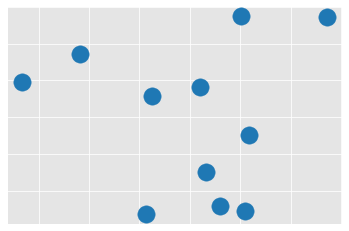

In [155]:
import networkx as nx

X = nx.Graph()
X.add_nodes_from(node_dict.keys())
nx.draw_networkx_nodes(X,node_dict,node_labels)
#nx.draw_networkx_labels(X,node_dict,node_labels)

In [156]:
node_dict.keys()

odict_keys(['Combo1', 'Combo2', 'Combo3', 'Combo4', 'Combo5', 'Combo6', 'Combo7', 'Combo8', 'Combo9', 'Combo10', 'Combo11'])

{'Combo1': Text(-0.17485436035968305, -0.5235712479842132, '\n\n4C72700E1C '),
 'Combo2': Text(0.20406848391775745, 0.5477356188554594, '\n\n4C72700E2E '),
 'Combo3': Text(0.23527691627147174, -0.09732276913896215, '\n\n4C72700E0D '),
 'Combo4': Text(-0.43588821250254944, 0.34503112702103494, '\n\n4C72700E2C '),
 'Combo5': Text(0.041302573859034304, 0.16645252776686867, '\n\n4C72700E2E '),
 'Combo6': Text(0.11938202453149419, -0.481804495500295, '\n\n4C72700E0D '),
 'Combo7': Text(-0.6642197918061509, 0.1921187720071717, '\n\n58d34926c760 '),
 'Combo8': Text(0.06285306401617796, -0.29816119241831956, '\n\n4C72700E1C '),
 'Combo9': Text(0.5439075558127493, 0.5414891014887805, '\n\n4C72700E2E '),
 'Combo10': Text(0.21752162611683415, -0.5072579316804862, '\n\n4C72700E1C '),
 'Combo11': Text(-0.14934987985713544, 0.11529048958296065, '\n\n4C72700E2C ')}

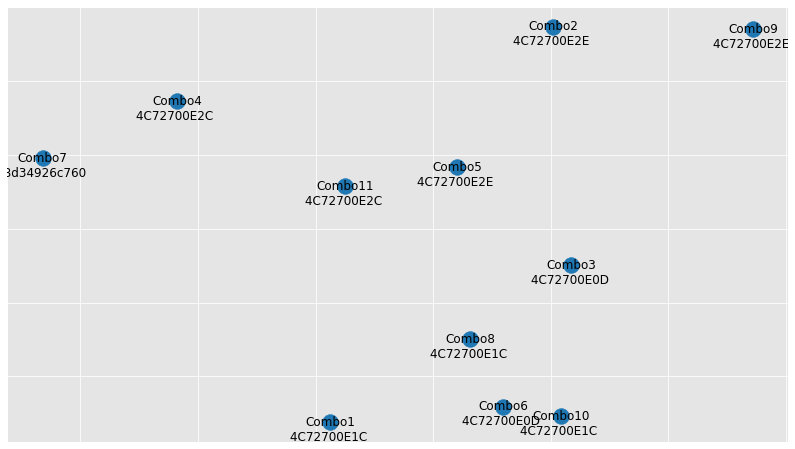

In [157]:
import matplotlib.pyplot as plt

'''
['fivethirtyeight',
 'seaborn-pastel',
 'seaborn-whitegrid',
 'ggplot',
 'grayscale']
 https://jakevdp.github.io/PythonDataScienceHandbook/04.11-settings-and-stylesheets.html
'''
plt.style.use('ggplot')
plt.figure(figsize=(14,8))

#T = nx.minimum_spanning_tree(X) 
nx.draw_networkx(X, node_dict, node_labels, node_size = 250, width=3, edge_color = 'grey')
nx.draw_networkx_labels(X, node_dict,node_labels)
#nx.draw(T, node_dict, with_labels = True)
#plt.show()

In [158]:
compress_data['topo1']['topology']

['4C72700E0D.4C72700E1C',
 '4C72700E1C.4C72700E0D',
 '4C72700E1C.4C72700E2C',
 '4C72700E1C.f081731d0c40',
 '4C72700E2C.4C72700E1C',
 '4C72700E2C.4C72700E2E',
 '4C72700E2C.58d34926c760',
 '4C72700E2E.4C72700E2C']

In [159]:
# function() to take a combo number, and generate a new data sequence on already selected combos + the new combo
## How would it take input from another combo/data/topology stream ??
# Then count transitions of this to existing combos. 
# Match to combos existing in the current iteration (not required in this case)
# 

In [160]:
# Function to add a combo (in the same topology) to an existing map
# A slightly easier version of adding a combo from a different topology to an exisitng map

# filter the time series using only selected combos
data1 = compress_data['topo1']['combo_sequence']
data3 = []
#top_combos = 7 #12  # replace with a list of selections
selected_combos = [i+1 for i in range(top_combos)]
additional_combo = [17]
selected_combos.extend(additional_combo)
for i in data1:
  if i in selected_combos:
    data3.append(i)

print(data3)

# compute a vector of transitions from new combo to exisitng ones
def compute_transition_vector(data, n, step = 1, newcombo=17):
    P = np.zeros(n)
    T = np.zeros(n)
    m = len(data)
    for i in range(1,m-1):
        initial, final = i, i+ step
        if data[initial]!=newcombo and data[final]==newcombo:
            P[data[initial]-1] += 1 # adjust for Combo1 naming
            T[data[initial]-1] += 1
            #print(final)

    #np.fill_diagonal(P, 2) # to reduce frequency effect
    #np.fill_diagonal(P, np.sum(P, axis=1)) # 
    #sums = np.sum(P, axis = 1)
    #for i in range(n):
    #    for j in range(n):
    #        P[i][j] = P[i][j] / sums[i]
    #        #P[i][j] = P[i][j] 
    return P,T

#print(compute_transition_matrix([3, 0, 1, 3, 2, 6, 5, 4, 7, 5, 4], 8, 1))

[3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 10, 6, 6, 6, 6, 6, 6, 1, 1, 1, 1, 1, 1, 6, 6, 6, 6, 6, 6, 10, 10, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 3, 3, 3, 3, 17, 9, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 9, 9, 17, 17, 9, 2, 9, 2, 2, 2, 9, 9, 9, 2, 9, 2, 2, 2, 2, 9, 2, 8, 3, 3, 3, 6, 6, 3, 3, 3, 3, 11, 11, 11, 11, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 17, 17, 17, 1, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 10, 10, 6, 6, 6, 6, 10, 1, 1, 1, 1, 1, 1, 6, 6, 6, 6, 10, 10, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 8, 8, 8, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 9, 2, 2, 2, 2, 9, 2, 2, 2, 2, 2, 2, 9, 9, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 1, 11, 3, 3, 3, 3, 3, 3, 6, 3, 3, 3, 11, 11, 11, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 7, 7, 7, 7, 7, 7, 5, 5, 5, 5, 5, 3, 3, 3, 6, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 11, 11, 11, 11, 8

In [161]:
P, T = compute_transition_vector(data3,top_combos,1,17)
print(T)
#selected_combos
#data1.index(17)

[0. 1. 2. 0. 1. 0. 0. 0. 1. 0. 0.]


In [162]:
T_norm = T/np.sum(T)
print(T_norm)

[0.  0.2 0.4 0.  0.2 0.  0.  0.  0.2 0.  0. ]


In [163]:
A = np.reshape(T_norm,(1,-1))  #converts into a 2D array with only one point, along the second dimension
new_coord = embedding.transform(A)
print(new_coord)

[[0.   0.08]]


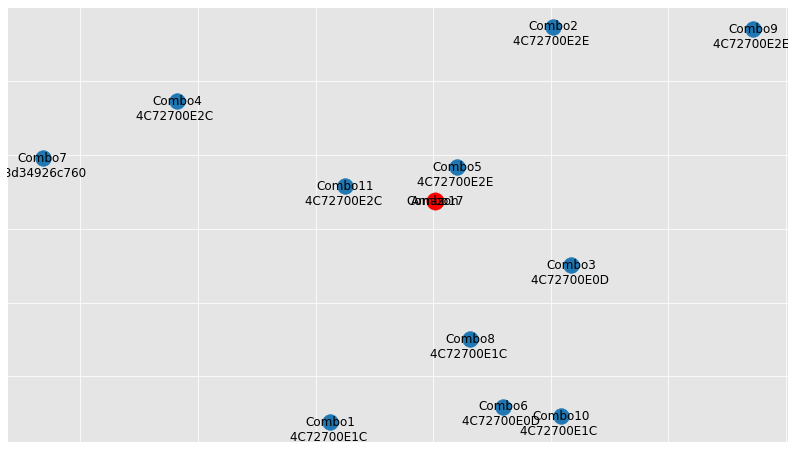

In [164]:

# forming added node dict and node labels
node_labels2 = OrderedDict()
node_dict2 = OrderedDict()
# 
len_data = X_2d.shape[0] #len(data_transition.keys())
for i in range(len_data):
    #print(i)
    comboname='Combo'+str(i)   # 
    combo_loc = compress_data['topo1']['transition_info']['Combo'+str(i+1)]['location']
    #print(combo_loc)
    node_dict2['Combo'+str(i+1)]=X_2d[i]
    node_labels2['Combo'+str(i+1)]= '\n\n'+combo_loc.split(':')[0]

node_dict2['Combo17'] = new_coord[0]
pos = new_coord[0]
node_labels2['Combo17'] = 'Amazon'

X2 = nx.Graph()
X2.add_nodes_from(node_dict2.keys())
#nx.draw_networkx_nodes(X,node_dict2,node_labels2)

plt.style.use('ggplot')
plt.figure(figsize=(14,8))

nx.draw_networkx(X2, node_dict2, node_labels2, node_size = 250, width=3, edge_color = 'grey')
nx.draw_networkx_labels(X2, node_dict2,node_labels2)


pos = nx.spring_layout(X2)

nx.draw_networkx_nodes(X2, node_dict2 , nodelist=['Combo17'], node_color='r')



In [51]:
pos

{'Combo1': array([-0.4 , -0.86]),
 'Combo2': array([ 0.32, -0.91]),
 'Combo3': array([0.36, 0.74]),
 'Combo4': array([ 0.9 , -0.45]),
 'Combo5': array([0.82, 0.25]),
 'Combo6': array([-0.89, -0.32]),
 'Combo7': array([-0.9 ,  0.55]),
 'Combo17': array([-0.21,  1.  ])}

In [43]:
node_dict2

OrderedDict([('Combo1', array([ 0.2 , -0.54])),
             ('Combo2', array([-0.25,  0.16])),
             ('Combo3', array([ 0.25, -0.18])),
             ('Combo4', array([0.01, 0.5 ])),
             ('Combo5', array([0.02, 0.02])),
             ('Combo6', array([-0.28, -0.56])),
             ('Combo7', array([0.05, 0.6 ])),
             ('Combo17', array([0.18, 0.08]))])

In [35]:
# generating sequences for alignement
seq1 = []
seq2 = []

for i in data2:
  if i==1:
    seq1.append(1)
  elif i==4:
    seq2.append(1)
  else:
    seq1.append(0)
    seq2.append(0)


    

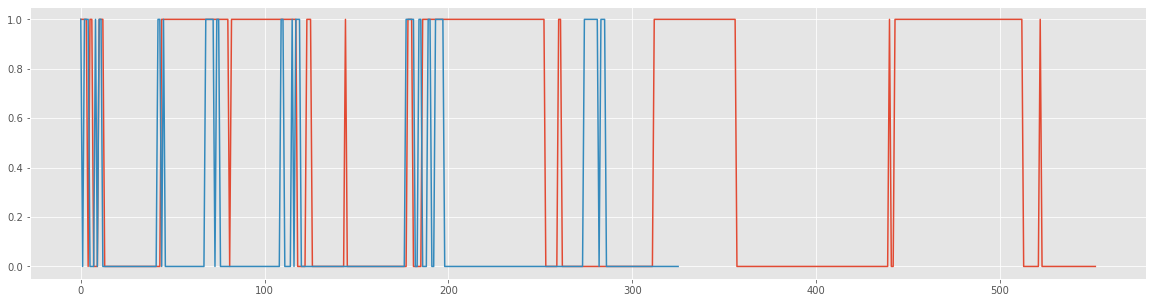

In [36]:
plt.figure(figsize=(20,5))
plt.plot(seq1)
plt.plot(seq2)

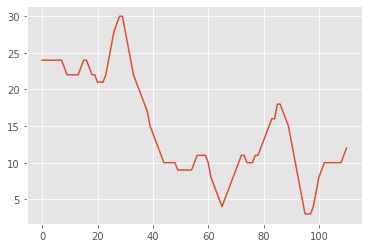

In [ ]:
a1 = np.correlate(seq2,seq1,'valid')

plt.figure()
plt.plot(a1)

In [ ]:
from pydtw import dtw1d

ModuleNotFoundError: ignored